# 로딩

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
! pip install klib
! pip install category_encoders
! pip install catboost

In [69]:
import os
import re
import klib
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option("display.max_columns", 30)

import sklearn
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, ShuffleSplit
from category_encoders import TargetEncoder, BinaryEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")


# 피쳐생성

In [70]:
encoder = TargetEncoder()

In [71]:
train = pd.read_csv('/content/drive/MyDrive/유전체 정보 품종 분류 AI 경진대회/train.csv')

In [72]:
test = pd.read_csv('/content/drive/MyDrive/유전체 정보 품종 분류 AI 경진대회/test.csv')

In [73]:
id_=test.id

In [74]:
target = train['class']

In [75]:
drop_=['father','mother','gender']

In [76]:
train.drop('class',axis=1, inplace=True)
train.drop(drop_,axis=1, inplace=True)
test.drop(drop_,axis=1, inplace=True)

In [77]:
a=['SNP_01', 'SNP_02','SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07',
   'SNP_08', 'SNP_09','SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']

### 'name' code
- bta
- ars
- bovine
- hapmap
- btb

In [78]:
# ars
ars=['SNP_02','SNP_03','SNP_04','SNP_09','SNP_11']
# bovine
bov=['SNP_05','SNP_06','SNP_08','SNP_15']
# hapmap
hap=['SNP_07','SNP_12','SNP_14']
# btb
btb=['SNP_10','SNP_13']

a.append('ars')
a.append('bov')
a.append('hap')
a.append('btb')

In [79]:
# ars

temp = ''

for i in ars:
    temp += train[i].str.replace(" ", "")

train['ars'] = temp


temp = ''

for i in ars:
    temp += test[i].str.replace(" ", "")

test['ars'] = temp

In [80]:
# bovine

temp = ''

for i in bov:
    temp += train[i].str.replace(" ", "")

train['bov'] = temp


temp = ''

for i in bov:
    temp += test[i].str.replace(" ", "")

test['bov'] = temp

In [81]:
# hapmap

temp = ''

for i in hap:
    temp += train[i].str.replace(" ", "")

train['hap'] = temp


temp = ''

for i in hap:
    temp += test[i].str.replace(" ", "")

test['hap'] = temp

In [82]:
# btb

temp = ''

for i in btb:
    temp += train[i].str.replace(" ", "")

train['btb'] = temp


temp = ''

for i in btb:
    temp += test[i].str.replace(" ", "")

test['btb'] = temp

### chrom
- 2: 01
- 6: 02~09
- 7: 10
- 8: 11
- 9: 12~14
- 10: 15

In [83]:
b=pd.Series(train['SNP_02']+train['SNP_03']+train['SNP_04']+train['SNP_05']+train['SNP_06']+train['SNP_07']+train['SNP_08']+train['SNP_09']+train['SNP_10'])
train['c6']= b.str.replace(' ','')

c=pd.Series(train['SNP_12']+train['SNP_13']+train['SNP_14'])
train['c9'] =c.str.replace(' ','')



b=pd.Series(test['SNP_02']+test['SNP_03']+test['SNP_04']+test['SNP_05']+test['SNP_06']+test['SNP_07']+test['SNP_08']+test['SNP_09']+test['SNP_10'])
test['c6']= b.str.replace(' ','')

c=pd.Series(test['SNP_12']+test['SNP_13']+test['SNP_14'])
test['c9'] =c.str.replace(' ','')


a.append('c6')
a.append('c9')

### cm

In [84]:
b=pd.Series(train['SNP_10']+train['SNP_12']+train['SNP_13']+train['SNP_14']+train['SNP_01']+train['SNP_03'])
train['60CM']= b.str.replace(' ','')

c=pd.Series(train['SNP_05']+train['SNP_06']+train['SNP_07']+train['SNP_08']+train['SNP_09'])
train['80CM'] = c.str.replace(' ','')



b=pd.Series(test['SNP_10']+test['SNP_12']+test['SNP_13']+test['SNP_14']+test['SNP_01']+test['SNP_03'])
test['60CM']= b.str.replace(' ','')

c=pd.Series(test['SNP_05']+test['SNP_06']+test['SNP_07']+test['SNP_08']+test['SNP_09'])
test['80CM'] = c.str.replace(' ','')


a.append('60CM')
a.append('80CM')

### pos

In [85]:
train['p4']=pd.Series(train['SNP_10']+train['SNP_01']+train['SNP_03']).str.replace(' ','')
train['p5']=pd.Series(train['SNP_04']+train['SNP_12']+train['SNP_13']).str.replace(' ','')
train['p6']=pd.Series(train['SNP_05']+train['SNP_06']+train['SNP_07']+train['SNP_08']).str.replace(' ','')
train['p7']=pd.Series(train['SNP_14']+train['SNP_09']).str.replace(' ','')

test['p4']=pd.Series(test['SNP_10']+test['SNP_01']+test['SNP_03']).str.replace(' ','')
test['p5']=pd.Series(test['SNP_04']+test['SNP_12']+test['SNP_13']).str.replace(' ','')
test['p6']=pd.Series(test['SNP_05']+test['SNP_06']+test['SNP_07']+test['SNP_08']).str.replace(' ','')
test['p7']=pd.Series(test['SNP_14']+test['SNP_09']).str.replace(' ','')

In [86]:
a.append('p4')
a.append('p5')
a.append('p6')
a.append('p7')

In [87]:
target = target.replace({'A':0, 'B':1, 'C':2})

In [88]:
train[a]=encoder.fit_transform(train[a],target)

In [89]:
test[a]=encoder.transform(test[a])

In [90]:
import klib

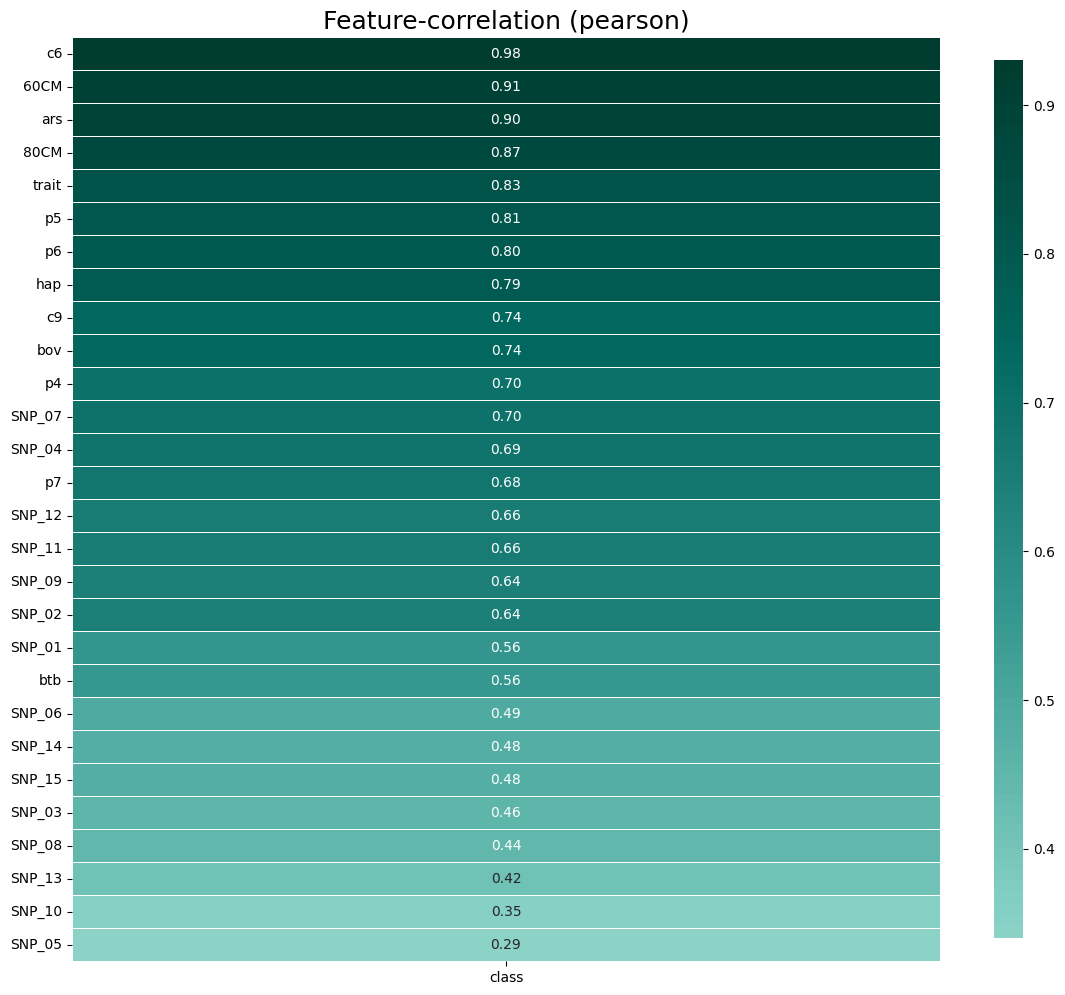

In [91]:
klib.corr_plot(data = train.iloc[:,1:],
               target = target,
               figsize = (14, 12))

plt.show()

In [92]:
train.iloc[:,2:]

,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,ars,bov,hap,btb,c6,c9,60CM,80CM,p4,p5,p6,p7
0,1.32624,1.27824,0.67214,0.76363,1.26713,1.45216,1.35583,1.17684,1.35714,1.23179,1.15619,1.41176,1.16779,1.26486,1.26165,1.03227,1.03227,1.26992,1.10558,1.03320,1.16819,1.06359,1.03227,1.23850,1.02464,1.03227,1.38816
1,1.05623,1.27824,1.35846,1.56664,0.75549,1.17213,1.35583,1.34360,1.35714,0.94197,1.57732,1.01382,0.69568,1.26486,1.26165,1.24306,1.25063,1.28665,0.68268,1.17460,1.19842,1.16331,1.33179,1.19546,1.28469,1.33179,1.38816
2,1.32624,0.49082,0.67214,0.76363,1.12178,0.50778,1.35583,1.34360,0.44478,0.94197,1.57732,1.41176,1.16779,1.26486,1.26165,1.03320,1.03176,1.26992,1.12953,1.03320,1.16819,1.03320,1.03275,1.17401,1.02464,1.03121,0.83942
3,0.23975,0.49082,0.67214,0.76363,0.75549,0.50778,0.04475,0.57528,0.44157,0.94197,0.36269,0.14611,0.69568,1.26486,0.36576,0.86377,0.34448,0.83280,0.68268,0.86377,0.86214,0.86377,0.49315,0.39195,0.44157,0.13507,0.90577
4,1.32624,0.49082,1.33605,1.56664,1.12178,1.45216,1.35583,0.57528,1.35714,1.23179,1.57732,1.41176,1.37876,1.26486,1.17995,1.13525,1.17460,1.26992,1.28643,1.16331,1.34172,1.11188,1.17715,1.20097,1.54740,1.17715,1.38816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.05623,1.27824,0.67214,0.76363,1.12178,1.17213,1.35583,1.34360,1.35714,1.23179,1.15619,1.01382,1.16779,1.26486,1.26165,1.03227,1.02633,1.28665,1.10558,1.03275,1.02633,1.03275,1.07969,1.02864,1.03121,1.07410,1.38816
258,1.32624,1.65150,1.35846,1.56664,0.75549,1.17213,1.06111,1.34360,1.35714,0.94197,1.15619,1.41176,1.37876,1.26486,1.17995,1.19974,1.22843,1.37005,1.28991,1.16331,1.34172,1.18674,1.21363,1.24306,1.54740,1.21363,1.38816
259,1.05623,0.49082,0.67214,0.76363,0.75549,1.17213,0.04475,1.34360,0.44478,0.55961,0.36269,0.14611,0.69568,0.64282,0.36576,0.73808,1.06769,0.54502,0.35608,0.90309,0.46735,0.87781,0.90309,0.79723,0.44157,0.89090,0.67170
260,0.23975,0.49082,0.67214,0.76363,0.75549,0.50778,0.04475,0.57528,0.44478,0.94197,1.15619,1.01382,0.69568,0.64282,0.36576,0.88526,0.34448,0.69369,0.68268,0.87781,0.69656,0.83280,0.62154,0.39195,0.86214,0.13507,0.67170


In [93]:
from sklearn.preprocessing import  StandardScaler

In [94]:

scaler = StandardScaler()

train.iloc[:,2:] = pd.DataFrame(scaler.fit_transform(train.iloc[:,2:]))
test.iloc[:,2:] = pd.DataFrame(scaler.fit_transform(test.iloc[:,2:]))

# XGBOOST

In [95]:
from xgboost import XGBClassifier

In [96]:
XGBClassifier

xgboost.sklearn.XGBClassifier

In [97]:
select = SelectFromModel(estimator=XGBClassifier(), threshold='median')

In [98]:
select.fit(train.iloc[:,1:], target)

SelectFromModel(estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=None,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=None, ...),
                threshold='median')

In [99]:
# select 된 feature
idx = select.get_support()
train.iloc[:,1:].columns[idx]

Index(['trait', 'SNP_01', 'SNP_07', 'SNP_10', 'SNP_13', 'SNP_14', 'SNP_15',
       'ars', 'bov', 'hap', 'c6', '60CM', 'p4', 'p5'],
      dtype='object')

In [100]:
X_train = pd.DataFrame(select.transform(train.iloc[:,1:]))

y_train =  target

X_test = pd.DataFrame(select.transform(test.iloc[:,1:]))

In [101]:
import sklearn
f1 = sklearn.metrics.f1_score

In [102]:
from xgboost import XGBClassifier

m = XGBClassifier(
    booster='gbtree',
    max_depth=3,
    gamma=1,
    eta=0.4,
    reg_alpha=0.4,
    reg_lambda=0.8,
    min_child_weight=8,


    seed=777,
    n_estimators=100,
    colsample_bytree = 0.1,
    subsample = 0.4,
    objective='reg:linear',
    learning_rate=0.8,
    random_state=1

)
m.fit(X_train, y_train)
model_xg=pd.DataFrame(m.predict_proba(X_test))

In [103]:
model_xg= model_xg.reset_index()

In [104]:
model_xg['index'] = id_

In [105]:
model_xg.columns=['id','A','B','C']

In [106]:
model_xg['class']=model_xg.iloc[:,1:].idxmax(axis=1)

# LogitsicRegression

In [107]:
select = SelectFromModel(estimator=LogisticRegression(), threshold='median')

In [108]:
select.fit(train.iloc[:,1:], target)

SelectFromModel(estimator=LogisticRegression(), threshold='median')

In [109]:
# select 된 feature
idx = select.get_support()
train.iloc[:,1:].columns[idx]

Index(['SNP_01', 'SNP_04', 'SNP_07', 'SNP_08', 'SNP_10', 'SNP_13', 'SNP_14',
       'SNP_15', 'ars', 'bov', 'c6', '60CM', '80CM', 'p6'],
      dtype='object')

In [110]:
X_train = pd.DataFrame(select.transform(train.iloc[:,1:]))

y_train =  target

X_test = pd.DataFrame(select.transform(test.iloc[:,1:]))

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lrcv = LogisticRegression(random_state=0,
                           penalty='l2',
                           solver='saga',class_weight='balanced',C=0.1
                           )

In [113]:
lrcv.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=0,
                   solver='saga')

In [114]:
lrcv.score(X_train, y_train)

0.9923664122137404

In [115]:
lrcv.predict_proba(X_test)

array([[6.89166539e-01, 1.20024201e-01, 1.90809260e-01],
       [2.83582453e-02, 7.80707889e-01, 1.90933865e-01],
       [4.13961989e-03, 7.26522114e-03, 9.88595159e-01],
       [4.89427119e-03, 3.70856762e-01, 6.24248967e-01],
       [9.88231743e-01, 1.17635705e-02, 4.68614381e-06],
       [3.07586006e-03, 6.44323847e-01, 3.52600293e-01],
       [3.03544051e-03, 7.54345118e-03, 9.89421108e-01],
       [1.69426216e-02, 7.77324281e-01, 2.05733098e-01],
       [8.93421202e-01, 4.67923898e-03, 1.01899559e-01],
       [9.99052642e-01, 9.45642279e-04, 1.71533406e-06],
       [1.21513273e-02, 3.69404557e-01, 6.18444115e-01],
       [1.47286143e-02, 9.48710833e-01, 3.65605529e-02],
       [5.90013025e-03, 8.66742550e-01, 1.27357320e-01],
       [9.97484314e-01, 2.49534492e-03, 2.03411105e-05],
       [6.52224434e-03, 7.59398437e-01, 2.34079319e-01],
       [1.73134418e-02, 8.03521701e-01, 1.79164858e-01],
       [9.95517004e-01, 4.47382517e-03, 9.17119870e-06],
       [2.07711995e-02, 8.43316

In [116]:
pred_proba = lrcv.predict_proba(X_test)

print("\nLR CV mean score: ", lrcv.score(X_train, y_train))


LR CV mean score:  0.9923664122137404


In [117]:
model_Logistic=pd.DataFrame(pred_proba).reset_index()

In [118]:
model_Logistic['index'] = id_

In [119]:
model_Logistic.rename(columns = {'index':'id',0:'A',1:'B',2:'C'},inplace=True)

In [120]:
pd.options.display.float_format = '{:.5f}'.format

In [121]:

model_Logistic['class']=model_Logistic.iloc[:,1:].idxmax(axis=1)

# XG+LR

In [123]:
a=[id_,((model_xg.iloc[:,1:4]*0.5 + model_Logistic.iloc[:,1:4]*0.5))]

In [124]:
ensemble_proba=pd.DataFrame(pd.concat(a,axis=1))

In [125]:
ensemble=pd.DataFrame(pd.concat(a,axis=1).iloc[:,1:].idxmax(axis=1))

In [126]:
ensemble.reset_index(inplace=True)

In [127]:
ensemble.columns=['id','class']

In [128]:
ensemble.id = id_

In [ ]:
ensemble.to_csv("XG+LR.csv",index=False)